## Scale preprocess

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
for n in range(30):
    train = pd.read_csv(f"./../../ordinal_regression/orca/datasets2/ordinal-regression/balance-scale/matlab/train_balance-scale.{n}", delimiter=" ", header = None)
    test = pd.read_csv(f"./../../ordinal_regression/orca/datasets2/ordinal-regression/balance-scale/matlab/test_balance-scale.{n}", delimiter=" ", header = None)
    f = pd.read_csv(f"./../tvaclm_exp/check_f/balance-scale{n}f.csv", header = None)
    x = pd.read_csv(f"./../tvaclm_exp/check_f/balance-scale{n}x.csv", header = None)
    x_sort_list = []
    for c in x.T.columns:
        x_sort_list.append(x.T[c].unique())

    f_sort_list = []
    for c in f.T.columns:
        f_sort_list.append(f.T[c].unique())

    map_dict = [{x_sort_list[i][j]: f_sort_list[i][j] for j in range(len(f_sort_list[i]))} for i in range(len(f_sort_list))]
    for i,c in enumerate(train.iloc[:,:-1].columns):
        train[c] = train[c].map(lambda x: map_dict[i][x])

    for i,c in enumerate(test.iloc[:,:-1].columns):
        test[c] = test[c].map(lambda x: map_dict[i][x])
    
    train.to_csv(f"./../../ordinal_regression/orca/msi/balance-scale/matlab/train_balance-scale.{n}", sep=" ", header = False, index = False)
    test.to_csv(f"./../../ordinal_regression/orca/msi/balance-scale/matlab/test_balance-scale.{n}", sep=" ", header = False, index = False)

# train.to_csv(f"./../../ordinal_regression/orca/msi/balance-scale/matlab/train_balance-scale.0", sep=" ", header = False, index = False)
# test.to_csv(f"./../../ordinal_regression/orca/msi/balance-scale/matlab/test_balance-scale.0", sep=" ", header = False, index = False)

In [28]:
for n in range(30):
    train = pd.read_csv(f"./../../ordinal_regression/orca/datasets2/ordinal-regression/balance-scale/matlab/train_balance-scale.{n}", delimiter=" ", header = None)
    test = pd.read_csv(f"./../../ordinal_regression/orca/datasets2/ordinal-regression/balance-scale/matlab/test_balance-scale.{n}", delimiter=" ", header = None)
    train.iloc[:,:-1] = np.exp(train.iloc[:,:-1])
    test.iloc[:,:-1] = np.exp(test.iloc[:,:-1])
        
    train.to_csv(f"./../../ordinal_regression/orca/msi/balance-scale-exp/matlab/train_balance-scale-exp.{n}", sep=" ", header = False, index = False)
    test.to_csv(f"./../../ordinal_regression/orca/msi/balance-scale-exp/matlab/test_balance-scale-exp.{n}", sep=" ", header = False, index = False)

# train.to_csv(f"./../../ordinal_regression/orca/msi/balance-scale/matlab/train_balance-scale.0", sep=" ", header = False, index = False)
# test.to_csv(f"./../../ordinal_regression/orca/msi/balance-scale/matlab/test_balance-scale.0", sep=" ", header = False, index = False)

PermissionError: [Errno 13] Permission denied: './../../ordinal_regression/orca/datasets2/msi/balance-scale-exp/matlab/train_balance-scale-exp.0'

## Analysis

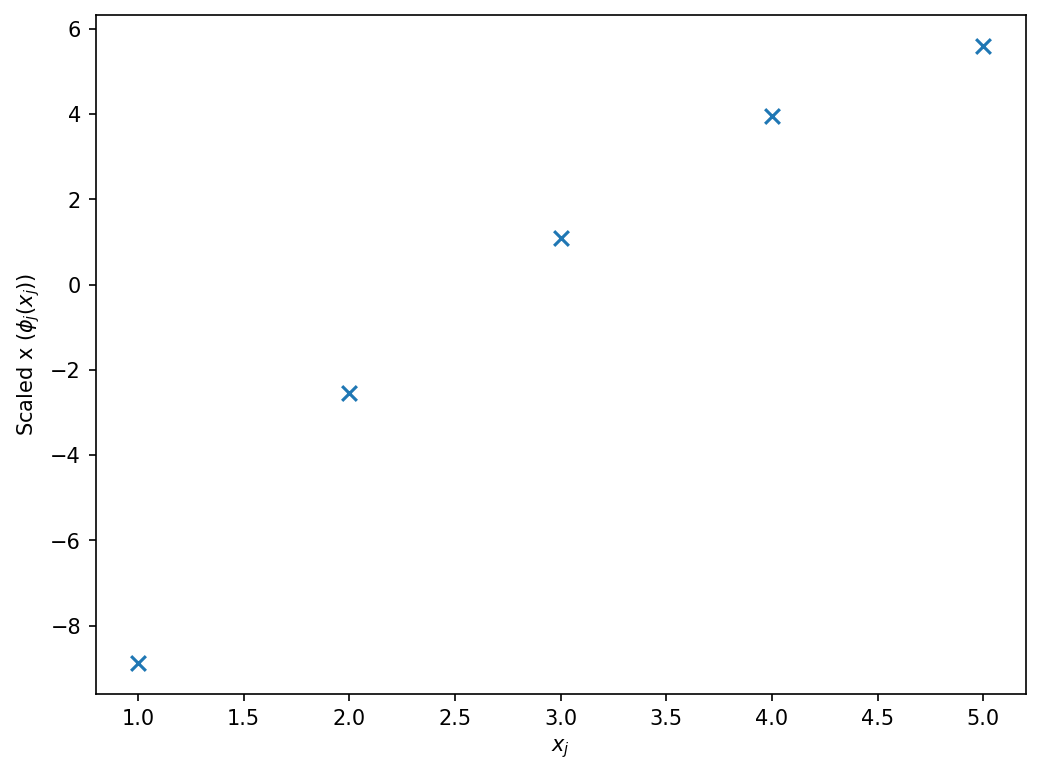

In [19]:
x = list(map_dict[3].keys())+[1.99,2.99,3.99,4.99,5.1]
x.sort()
y = list(map_dict[3].values())*2
y.sort()
# plt.plot(x, y)
fig = plt.figure(figsize=(8, 6), dpi=150, facecolor="white")
# plt.plot(map_dict[3].keys(), map_dict[3].values(), linestyle="dotted")
plt.scatter(map_dict[3].keys(), map_dict[3].values(),s=50,marker="x")
# plt.legend(loc='lower right')
# plt.xlim(10,20000)
plt.xlabel(fr"$x_j$")
plt.ylabel(fr"Scaled x ($\phi_j(x_j)$)")
# plt.grid( linestyle='dotted')
plt.savefig("figs/monotonic_scale.pdf")

In [27]:
scaled_res = pd.read_csv("./../../ordinal_regression/orca/src/Experiments/msi/exp-2023-1-7-0-15-10/Results/balance-scale-msi/results_test.csv")
original_res = pd.read_csv("./../../ordinal_regression/orca/src/Experiments/clm/or/Results/balance-scale-pom-10/results_test.csv")
scal = scaled_res[['Dataset','Acc','MAE']]
scal.columns=['Dataset','scaled_acc','scaled_mae']
orig = original_res[['Dataset','Acc','MAE']]
orig.columns=['Dataset','orig_acc','orig_mae']
df = pd.merge(scal,orig, on="Dataset")

In [5]:
df.to_csv("./result_files/monotonic_scale_invariance/scaled_clm_test.csv")

In [5]:
scaled_res = pd.read_csv("./../../ordinal_regression/orca/src/Experiments/msi/exp-2023-1-7-0-15-10/Results/balance-scale-msi/results_test.csv")
original_res = pd.read_csv("./../../ordinal_regression/orca/src/Experiments/clm/or/Results/balance-scale-pom-10/results_test.csv")
scal = scaled_res[['Dataset','Acc','MAE']]
scal.columns=['Dataset','scaled_acc','scaled_mae']
orig = original_res[['Dataset','Acc','MAE']]
orig.columns=['Dataset','orig_acc','orig_mae']
df = pd.merge(scal,orig, on="Dataset")

scaled_res = pd.read_csv("./../../ordinal_regression/orca/src/Experiments/msi/svorlin.csv")
original_res = pd.read_csv("./../../ordinal_regression/orca/src/Experiments/svorLin/or/Results/balance-scale-svorim-lin-5/results_test.csv")
scal = scaled_res[['Dataset','Acc','MAE']]
scal.columns=['Dataset','scaled_acc','scaled_mae']
orig = original_res[['Dataset','Acc','MAE']]
orig.columns=['Dataset','orig_acc','orig_mae']
df1 = pd.merge(scal,orig, on="Dataset")

scaled_res = pd.read_csv("./../../ordinal_regression/orca/src/Experiments/msi/svorim.csv")
original_res = pd.read_csv("./../../ordinal_regression/orca/src/Experiments/svorim/or/Results/balance-scale-svorim-or/results_test.csv")
scal = scaled_res[['Dataset','Acc','MAE']]
scal.columns=['Dataset','scaled_acc','scaled_mae']
orig = original_res[['Dataset','Acc','MAE']]
orig.columns=['Dataset','orig_acc','orig_mae']
df2 = pd.merge(scal,orig, on="Dataset")

In [10]:
df.to_csv("./result_files/monotonic_scale_invariance/scaled_clm_train.csv")

In [12]:
df2.mean()

<ipython-input-12-4a56ca50fe8e>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2.mean()


scaled_acc    98.598726
scaled_mae     0.014013
orig_acc      99.766454
orig_mae       0.002335
dtype: float64

In [4]:
scaled_res

,Dataset-Experiment,MeanAcc,StdAcc,MeanGM,StdGM,MeanMS,StdMS,MeanMAE,StdMAE,MeanAMAE,...,StdWkappa,MeanTrainTime,StdTrainTime,MeanTestTime,StdTestTime,MeanCrossvalTime,StdCrossvalTime,MeanC,StdC,Unnamed: 27
0,balance-scale-scale-svorlin,98.619958,0.768044,98.698961,1.210347,97.029915,2.950303,0.0138,0.00768,0.012832,...,0.007749,0.087382,0.064539,0.145164,0.077764,20.579718,2.432474,394.970586,324.942811,NaN


In [26]:
df

,Dataset,scaled_acc,scaled_mae,orig_acc,orig_mae
0,train_balance-scale.0,100.0,0.0,91.880342,0.094017
1,train_balance-scale.1,100.0,0.0,91.880342,0.096154
2,train_balance-scale.10,100.0,0.0,92.307692,0.089744
3,train_balance-scale.11,100.0,0.0,91.880342,0.091880
4,train_balance-scale.12,100.0,0.0,91.880342,0.091880
5,train_balance-scale.13,100.0,0.0,92.307692,0.087607
6,train_balance-scale.14,100.0,0.0,91.666667,0.094017
7,train_balance-scale.15,100.0,0.0,92.307692,0.087607
8,train_balance-scale.16,100.0,0.0,91.239316,0.102564
9,train_balance-scale.17,100.0,0.0,92.094017,0.094017
